# Subproject a
- Age vs eagerness to use platform correlation
- Author: Sergio S. (GitHub: esesancr) (mail: esesancr@gmail.com)

---

# Imports

#### Python libraries

In [1]:
import pandas as pd

import numpy as np

import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#### Ancillary modules

In [2]:
## Reloading module
%load_ext autoreload
%autoreload 2

from Sp_a_params import *
from Sp_a_funcs import *

---

# Upload and clean data

In [3]:
df = pd.read_csv(os.path.join(relative_data_loc, file_name))

In [4]:
cleaning_df(df)
df

,ID,Considera_tele,Cree_comun_tele,Regularidad_uso,Fecha_nacimiento
0,721,SI,5: Totalmente Común,3: Neutral,26/03/70
1,386,SI,3: Neutral,3: Neutral,29/05/77
2,652,SI,2: Poco común,1: No la utilizaría,01/01/78
3,362,SI,3: Neutral,2: Con poca regularidad,0
4,28,SI,4: Muy Común,3: Neutral,0
...,...,...,...,...,...
760,533,NO,4: Muy Común,5: Regularmente,0
761,201,NO,5: Totalmente Común,1: No la utilizaría,0
762,40,SI,2: Poco común,2: Con poca regularidad,0
763,63,NO,1: No será común,1: No la utilizaría,0


In order to avoid any bias in the analysis of the information, the next step is to remove all dates `Fecha_nacimiento`$=0$

In [5]:
df.drop(df[df.Fecha_nacimiento=='0'].index,inplace=True) #"Removing" all date of birth==0.

In [6]:
df

,ID,Considera_tele,Cree_comun_tele,Regularidad_uso,Fecha_nacimiento
0,721,SI,5: Totalmente Común,3: Neutral,26/03/70
1,386,SI,3: Neutral,3: Neutral,29/05/77
2,652,SI,2: Poco común,1: No la utilizaría,01/01/78
5,501,SI,3: Neutral,3: Neutral,26/04/83
7,253,SI,3: Neutral,4: Con cierta regularidad,05/04/58
...,...,...,...,...,...
755,164,NO,1: No será común,2: Con poca regularidad,27/01/58
756,22,SI,3: Neutral,2: Con poca regularidad,12/02/51
757,390,NO,1: No será común,3: Neutral,28/10/49
758,259,SI,4: Muy Común,1: No la utilizaría,27/12/67


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 759
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                738 non-null    int64 
 1   Considera_tele    738 non-null    object
 2   Cree_comun_tele   738 non-null    object
 3   Regularidad_uso   738 non-null    object
 4   Fecha_nacimiento  738 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.6+ KB


The next step is to convert `Fecha_nacimiento` to date-time format as shown below.

In [8]:
#Convertion of dtype obj to datetime ob.
df["Fecha_nacimiento"] = pd.to_datetime(df["Fecha_nacimiento"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 759
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                738 non-null    int64         
 1   Considera_tele    738 non-null    object        
 2   Cree_comun_tele   738 non-null    object        
 3   Regularidad_uso   738 non-null    object        
 4   Fecha_nacimiento  738 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.6+ KB


In [10]:
df.Fecha_nacimiento

0     1970-03-26
1     1977-05-29
2     1978-01-01
5     1983-04-26
7     2058-05-04
         ...    
755   2058-01-27
756   2051-12-02
757   2049-10-28
758   2067-12-27
759   1980-08-01
Name: Fecha_nacimiento, Length: 738, dtype: datetime64[ns]

Pandas `to_datetime` function has a parsing error where for some year values, the year is sometimes correct but sometimes not. For example year 27/12/67 is converted to 2067-12-27.

In order to correct this we create a function that solves the parsing of wrong years.

In [11]:
#Function that corrects the parsing of wrong years.
import datetime

def fix_date(x):
    if x.year > 2002:
        year = x.year - 100
    else:
        year = x.year

    return datetime.date(year,x.month,x.day)

In [12]:
df['Fecha_nacimiento'] = df['Fecha_nacimiento'] .apply(fix_date) #Solving the parsing issue.
df.Fecha_nacimiento

0      1970-03-26
1      1977-05-29
2      1978-01-01
5      1983-04-26
7      1958-05-04
          ...    
755    1958-01-27
756    1951-12-02
757    1949-10-28
758    1967-12-27
759    1980-08-01
Name: Fecha_nacimiento, Length: 738, dtype: object

The next step is to compute doctor's age based on birthday date.

In [13]:
#Function that computes doctor's age.
import datetime

def compute_age(x):
    age=2020-x.year

    return age

In [14]:
df['Edad'] = df['Fecha_nacimiento'] .apply(compute_age) #Computing doctor's age.
df.Edad

0      50
1      43
2      42
5      37
7      62
       ..
755    62
756    69
757    71
758    53
759    40
Name: Edad, Length: 738, dtype: int64

In [15]:
df

,ID,Considera_tele,Cree_comun_tele,Regularidad_uso,Fecha_nacimiento,Edad
0,721,SI,5: Totalmente Común,3: Neutral,1970-03-26,50
1,386,SI,3: Neutral,3: Neutral,1977-05-29,43
2,652,SI,2: Poco común,1: No la utilizaría,1978-01-01,42
5,501,SI,3: Neutral,3: Neutral,1983-04-26,37
7,253,SI,3: Neutral,4: Con cierta regularidad,1958-05-04,62
...,...,...,...,...,...,...
755,164,NO,1: No será común,2: Con poca regularidad,1958-01-27,62
756,22,SI,3: Neutral,2: Con poca regularidad,1951-12-02,69
757,390,NO,1: No será común,3: Neutral,1949-10-28,71
758,259,SI,4: Muy Común,1: No la utilizaría,1967-12-27,53


# Initial data exploration

#### Histograms

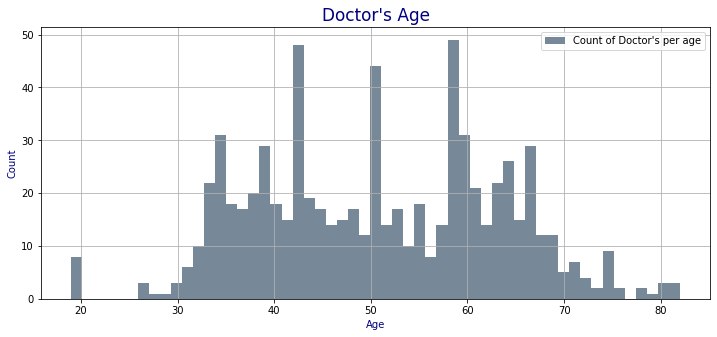

In [16]:
dfx = df.copy()

fig, ax = plt.subplots()

plt.hist(
    dfx['Edad'],
    color='lightslategray',
    bins=55
)

fig.set_size_inches(12, 5)

plt.title('Doctor\'s Age',fontsize=17,color='Navy')
plt.xlabel('Age',color='Navy')
plt.ylabel('Count',color='Navy')

plt.grid(True)
plt.legend(['Count of Doctor\'s per age'],loc=0)
plt.show()

As we can see in the first data exploration there are some doctors who are under 20 yo. This behavior is probably an inconsistency in the database because the interviewed doctors are "Internists" and "Endocrinologists" who generally graduate after the age of 22 yo.

To avoid any bias in the analysis we decided to delete these records as follows:

In [17]:
df.drop(df[df.Edad<22].index,inplace=True) # "Removing" registers where doctor is younger than 22 yo 

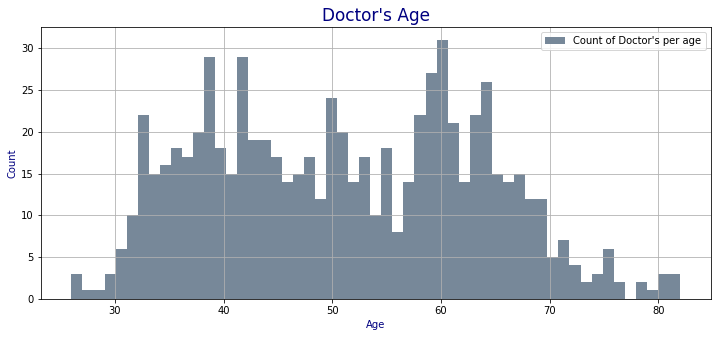

In [18]:
dfx = df.copy()

fig, ax = plt.subplots()

plt.hist(
    dfx['Edad'],
    color='lightslategray',
    bins=55
)

fig.set_size_inches(12, 5)

plt.title('Doctor\'s Age',fontsize=17,color='Navy')
plt.xlabel('Age',color='Navy')
plt.ylabel('Count',color='Navy')

plt.grid(True)
plt.legend(['Count of Doctor\'s per age'],loc=0)
plt.show()

# Analysis 

#### Doctor's age and his/her perception about the attractiveness of telemedicine

The objective of this analysis is to try to identify if there is already a relationship between doctor's age and his/her perception about the attractiveness of telemedicine.

The survey ansewerd by $765$ Internists and Endocrinologists contains a field called `Considera_tele` that answers the question **If they are willing to offer medical assistance (telemedicine)**

As first approach we plot the histogram showing the count of 'Negative' and 'Positive' perceptions of doctors grouped by doctor's age.

As we see below, histogram doesn't provide information to identify whether there is a relationship between doctor's age and his/her perception about telemedicine.

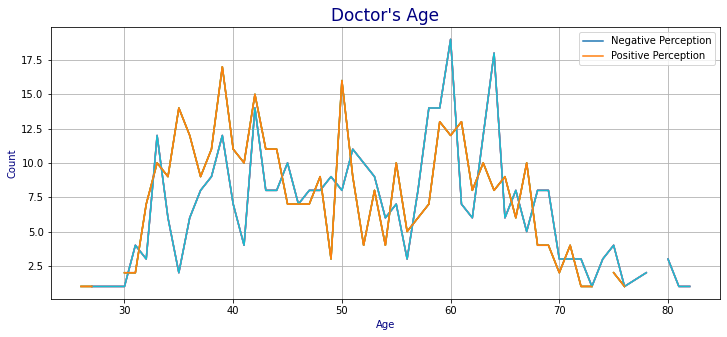

In [19]:
dfx = df.copy()

fig, ax = plt.subplots()

dfx.groupby(['Edad','Considera_tele']).count().unstack().plot(ax=ax)

fig.set_size_inches(12, 5)

plt.title('Doctor\'s Age',fontsize=17,color='Navy')
plt.xlabel('Age',color='Navy')
plt.ylabel('Count',color='Navy')

plt.grid(True)
plt.legend(['Negative Perception','Positive Perception'],loc=0)
plt.show()

In [20]:
#Creating groups in order to summarize perception information.
ggroup_perc_count= df['ID'].groupby([df['Edad'],df['Considera_tele']]).count().reset_index() #Creating pandas df for count per perception
ggroup_total_count= df['ID'].groupby([df['Edad']]).count().reset_index() #Creating pandas df for total count

In [21]:
ggroup_perc=pd.merge(ggroup_perc_count,ggroup_total_count,on='Edad') #Merging pandas df

#Renaming ggroup_perception cols names
rc = {
    'ID_x': 'Conteo',
    'ID_y':'Total'
    }

ggroup_perc.rename(rc, axis=1, inplace=True)

ggroup_perc

,Edad,Considera_tele,Conteo,Total
0,26,SI,1,1
1,27,NO,1,2
2,27,SI,1,2
3,28,NO,1,1
4,29,NO,1,1
...,...,...,...,...
103,79,SI,1,1
104,80,NO,3,3
105,81,NO,1,2
106,81,SI,1,2


In [22]:
ggroup_no = ggroup_perc.copy()
ggroup_si = ggroup_perc.copy()

ggroup_no.drop(ggroup_no[ggroup_no.Considera_tele=='SI'].index,inplace=True) #"Removing".
ggroup_si.drop(ggroup_si[ggroup_si.Considera_tele=='NO'].index,inplace=True) #"Removing".
ggroup_si.drop(ggroup_si[ggroup_si.Considera_tele=='No'].index,inplace=True) #"Removing".

np_neg_perc=ggroup_no.to_numpy() #Creating numpy array "Negative Perception" from pandas dataframe
np_pos_perc=ggroup_si.to_numpy() #Creating numpy array "Positive Perception" from pandas dataframe

In [34]:
#Negative Perception
x_neg=np.array(np_neg_perc[:,0],dtype=float)
y_neg=np.array(np_neg_perc[:,2],dtype=float)
y_neg_esc=np.array(np_neg_perc[:,2]/np_neg_perc[:,3],dtype=float)

#Positive Perception
x_pos=np.array(np_pos_perc[:,0],dtype=float)
y_pos=np.array(np_pos_perc[:,2],dtype=float)
y_pos_esc=np.array(np_pos_perc[:,2]/np_pos_perc[:,3],dtype=float)

In [35]:
#Negative Perception
x=x_neg
y=y_neg_esc
ndegree = 1

coefficients = np.polyfit(x,y,ndegree)
y_hat_numpy = coefficients[1] + coefficients[0] * x

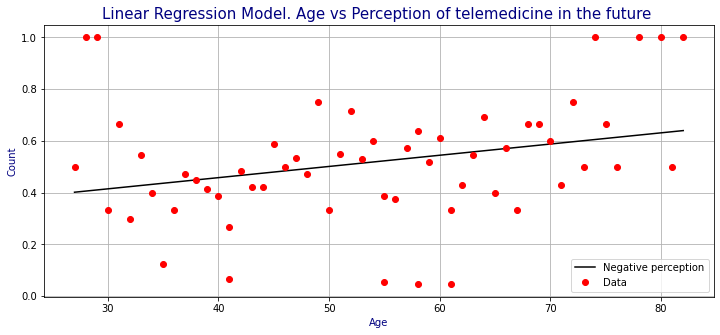

In [36]:
fig, ax = plt.subplots()

plt.plot(x, y_hat_numpy, 'k-',
         x, y, 'ro')

fig.set_size_inches(12, 5)

plt.title('Linear Regression Model. Age vs Perception of telemedicine in the future ',fontsize=15,color='Navy')
plt.xlabel('Age',color='Navy')
plt.ylabel('Count',color='Navy')

plt.grid(True)
plt.legend(['Negative perception','Data'],loc=0)
plt.show()

In [37]:
#Positive Perception
x=x_pos
y=y_pos_esc
ndegree = 1

coefficients = np.polyfit(x,y,ndegree)
y_hat_numpy = coefficients[1] + coefficients[0] * x

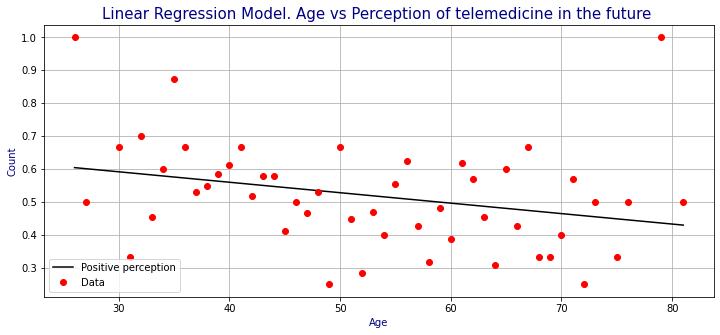

In [38]:
fig, ax = plt.subplots()

plt.plot(x, y_hat_numpy, 'k-',
         x, y, 'ro')

fig.set_size_inches(12, 5)

plt.title('Linear Regression Model. Age vs Perception of telemedicine in the future ',fontsize=15,color='Navy')
plt.xlabel('Age',color='Navy')
plt.ylabel('Count',color='Navy')

plt.grid(True)
plt.legend(['Positive perception','Data'],loc=0)
plt.show()